In [1]:
import set_math

success import scipy
success import pandas
success import numpy
success import sympy
success import matplotlib.pyplot
Hangul OK in your MAC !!!


In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('../data/05. data_sample_V3', index_col = 0)

In [4]:
data

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,dayofweek,is_holiday
0,2012-01-01,1,1,9,29,M,RA FZFG BR,Sun,holiday
1,2012-01-01,1,1,28,2,M,RA FZFG BR,Sun,holiday
2,2012-01-01,1,1,51,1,M,RA FZFG BR,Sun,holiday
3,2012-01-01,2,16,16,25,16,RA,Sun,holiday
4,2012-01-01,2,16,25,187,16,RA,Sun,holiday
5,2012-01-01,3,21,5,58,9,,Sun,holiday
6,2012-01-01,3,21,44,129,9,,Sun,holiday
7,2012-01-01,3,29,8,14,9,,Sun,holiday
8,2012-01-01,3,29,41,37,9,,Sun,holiday
9,2012-01-01,3,29,45,98,9,,Sun,holiday


# codesum이 normal or abnormal로 분류한 후 3년간 트렌드가 비슷한지 확인해보자

In [5]:
def add_normalcode(codesum):
    if codesum == " ":
        return "Normal"
    else:
        return "Abnormal"

In [6]:
data['isnormal'] = data['codesum'].apply(add_normalcode)

In [7]:
data

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,dayofweek,is_holiday,isnormal
0,2012-01-01,1,1,9,29,M,RA FZFG BR,Sun,holiday,Abnormal
1,2012-01-01,1,1,28,2,M,RA FZFG BR,Sun,holiday,Abnormal
2,2012-01-01,1,1,51,1,M,RA FZFG BR,Sun,holiday,Abnormal
3,2012-01-01,2,16,16,25,16,RA,Sun,holiday,Abnormal
4,2012-01-01,2,16,25,187,16,RA,Sun,holiday,Abnormal
5,2012-01-01,3,21,5,58,9,,Sun,holiday,Normal
6,2012-01-01,3,21,44,129,9,,Sun,holiday,Normal
7,2012-01-01,3,29,8,14,9,,Sun,holiday,Normal
8,2012-01-01,3,29,41,37,9,,Sun,holiday,Normal
9,2012-01-01,3,29,45,98,9,,Sun,holiday,Normal


In [8]:
def make_year(date):
    return int(date.split('-')[0])

def make_month(date):
    return int(date.split('-')[1])

def make_day(date):
    return int(date.split('-')[2])

def make_monthday(date):
    return (date.split('-')[1:3])

In [9]:
data['monthday'] = data['date'].apply(make_monthday)

In [10]:
data['month'] = data['date'].apply(make_month)

In [11]:
data.tail()

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,dayofweek,is_holiday,isnormal,monthday,month
118689,2014-10-31,19,30,16,19,-6,RA SN,Fri,workday,Abnormal,"[10, 31]",10
118690,2014-10-31,19,30,44,69,-6,RA SN,Fri,workday,Abnormal,"[10, 31]",10
118691,2014-10-31,19,30,65,1,-6,RA SN,Fri,workday,Abnormal,"[10, 31]",10
118692,2014-10-31,20,17,9,24,M,,Fri,workday,Normal,"[10, 31]",10
118693,2014-10-31,20,17,37,25,M,,Fri,workday,Normal,"[10, 31]",10


In [12]:
# 2012 년은 윤년, 따라서 1~366일이 될 것이다.
def convert_days(monthday):
    
    month = int(monthday[0])
    day = int(monthday[1])
    
    common_year = [
        31,
        28 + 1,
        31,
        30,
        31,
        30,
        31,
        31,
        30,
        31,
        30,
        31
    ]
    
    tmp_day = 0
    
    if month >= 2:
        return sum(common_year[:month-1]) + day
    else:
        return day
    

In [13]:
data['year'] = data['date'].apply(make_year)

In [14]:
data['count'] = 1

### station_nbr 1 에 대하여 2012, 2013, 2014 년도 상반기만 뽑아서 Abnormal, normal의 트렌드를 분석할 계획. 
- 비슷한 트렌드를 보인다면 날씨도 예측할 수 있지 않을까? 하는 생각에...

In [15]:
data_2012 = data[data['year'].isin([2012])]
data_2012.tail()

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,dayofweek,is_holiday,isnormal,monthday,month,year,count
69309,2012-12-31,19,30,16,52,M,,Mon,workday,Normal,"[12, 31]",12,2012,1
69310,2012-12-31,19,30,44,177,M,,Mon,workday,Normal,"[12, 31]",12,2012,1
69311,2012-12-31,20,17,9,89,M,FG+ BR,Mon,workday,Abnormal,"[12, 31]",12,2012,1
69312,2012-12-31,20,17,37,63,M,FG+ BR,Mon,workday,Abnormal,"[12, 31]",12,2012,1
69313,2012-12-31,20,17,48,163,M,FG+ BR,Mon,workday,Abnormal,"[12, 31]",12,2012,1


In [16]:
data_2012['day'] = data_2012['monthday'].apply(convert_days)

/Users/kimdh/.pyenv/versions/3.5.0/envs/mv_env350/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
data_2012.tail()

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,dayofweek,is_holiday,isnormal,monthday,month,year,count,day
69309,2012-12-31,19,30,16,52,M,,Mon,workday,Normal,"[12, 31]",12,2012,1,366
69310,2012-12-31,19,30,44,177,M,,Mon,workday,Normal,"[12, 31]",12,2012,1,366
69311,2012-12-31,20,17,9,89,M,FG+ BR,Mon,workday,Abnormal,"[12, 31]",12,2012,1,366
69312,2012-12-31,20,17,37,63,M,FG+ BR,Mon,workday,Abnormal,"[12, 31]",12,2012,1,366
69313,2012-12-31,20,17,48,163,M,FG+ BR,Mon,workday,Abnormal,"[12, 31]",12,2012,1,366


In [134]:
tendency_2012 = data_2012.pivot_table(values = 'count', index = ['station_nbr','day'], columns=['isnormal'])
tendency_2012 = tendency_2012.fillna(value = 0).astype(int)
tendency_2012.head()

isnormal         Abnormal  Normal
station_nbr day                  
1           1           1       0
            2           0       1
            3           0       1
            4           0       1
            5           0       1

In [136]:
tendency_2012.loc[1][1:180].tail()

isnormal,Abnormal,Normal
day,,
176,0,1
177,1,0
178,0,1
179,1,0
180,0,1


# 2012년 station_nbr 1 의 상반기 abnormal 유무에 대한 heatmap

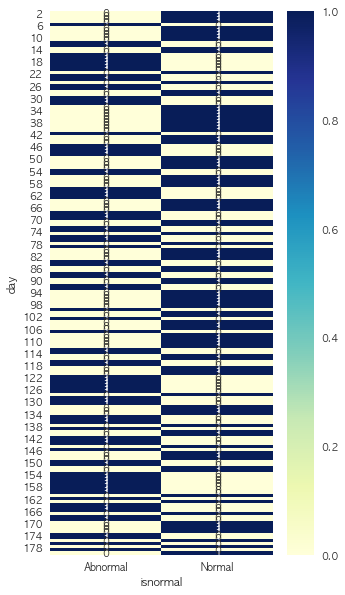

In [124]:
plt.figure(figsize = (5,10))
sns.heatmap(tendency_2012.loc[1][1:180], cmap="YlGnBu", annot = True, fmt = 'd')
plt.show()

In [125]:
data_2013 = data[data['year'].isin([2013])]
data_2013.tail()

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,dayofweek,is_holiday,isnormal,monthday,month,year,count
97390,2013-12-31,18,36,9,12,-5,,Tue,workday,Normal,"[12, 31]",12,2013,1
97391,2013-12-31,18,36,30,1,-5,,Tue,workday,Normal,"[12, 31]",12,2013,1
97392,2013-12-31,18,36,44,45,-5,,Tue,workday,Normal,"[12, 31]",12,2013,1
97393,2013-12-31,20,17,9,132,M,,Tue,workday,Normal,"[12, 31]",12,2013,1
97394,2013-12-31,20,17,37,50,M,,Tue,workday,Normal,"[12, 31]",12,2013,1


In [126]:
data_2013['day'] = data_2013['monthday'].apply(convert_days)

/Users/kimdh/.pyenv/versions/3.5.0/envs/mv_env350/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [137]:
tendency_2013 = data_2013.pivot_table(values = 'count', index = ['station_nbr','day'], columns=['isnormal'])
tendency_2013 = tendency_2013.fillna(value = 0).astype(int)
tendency_2013.head()

isnormal         Abnormal  Normal
station_nbr day                  
1           1           0       1
            2           0       1
            3           0       1
            4           0       1
            5           0       1

# 2013년 station_nbr 1 의 상반기 abnormal 유무에 대한 heatmap

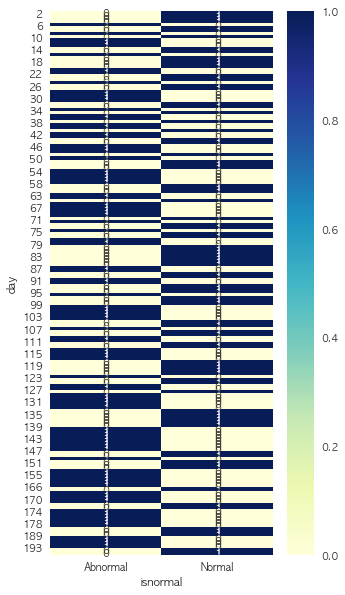

In [128]:
plt.figure(figsize = (5,10))
sns.heatmap(tendency_2013.loc[1][1:180], cmap="YlGnBu", annot = True, fmt = 'd')
plt.show()

In [129]:
data_2014 = data[data['year'].isin([2014])]
data_2014.tail()

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,dayofweek,is_holiday,isnormal,monthday,month,year,count
118689,2014-10-31,19,30,16,19,-6,RA SN,Fri,workday,Abnormal,"[10, 31]",10,2014,1
118690,2014-10-31,19,30,44,69,-6,RA SN,Fri,workday,Abnormal,"[10, 31]",10,2014,1
118691,2014-10-31,19,30,65,1,-6,RA SN,Fri,workday,Abnormal,"[10, 31]",10,2014,1
118692,2014-10-31,20,17,9,24,M,,Fri,workday,Normal,"[10, 31]",10,2014,1
118693,2014-10-31,20,17,37,25,M,,Fri,workday,Normal,"[10, 31]",10,2014,1


In [130]:
data_2014['day'] = data_2014['monthday'].apply(convert_days)

/Users/kimdh/.pyenv/versions/3.5.0/envs/mv_env350/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [138]:
tendency_2014 = data_2014.pivot_table(values = 'count', index = ['station_nbr','day'], columns=['isnormal'])
tendency_2014 = tendency_2014.fillna(value = 0).astype(int)
tendency_2014.head()

isnormal         Abnormal  Normal
station_nbr day                  
1           2           1       0
            3           1       0
            4           1       0
            5           1       0
            6           1       0

# 2014년 station_nbr 1 의 상반기 abnormal 유무에 대한 heatmap

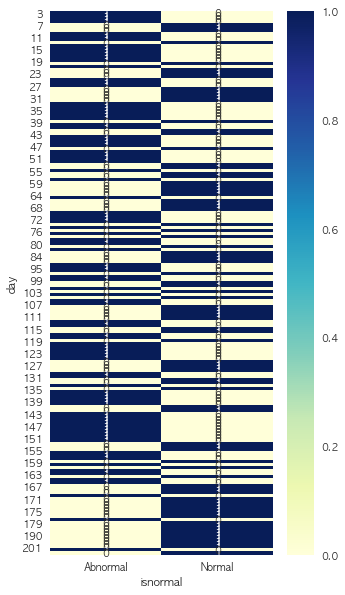

In [132]:
plt.figure(figsize = (5,10))
sns.heatmap(tendency_2014.loc[1][1:180], cmap="YlGnBu", annot = True, fmt = 'd')
plt.show()

# 3 개를 한번에 보면?

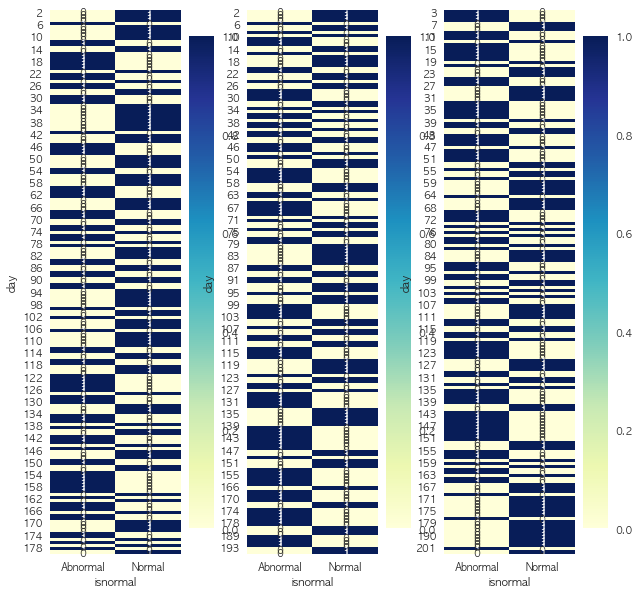

In [139]:
plt.figure(figsize = (10,10))

plt.subplot(131)
sns.heatmap(tendency_2012.loc[1][1:180], cmap="YlGnBu", annot = True, fmt = 'd')

plt.subplot(132)
sns.heatmap(tendency_2013.loc[1][1:180], cmap="YlGnBu", annot = True, fmt = 'd')

plt.subplot(133)
sns.heatmap(tendency_2014.loc[1][1:180], cmap="YlGnBu", annot = True, fmt = 'd')
plt.show()

### 결론: 단순히 normal, abnormal 만 가지고는 정확한 트렌드를 파악하기 어렵네요. codesum을 가지고 가장 많이 관측됐던 것을 몇개 뽑아서 트렌드를 파악해보겠습니다

- 예를들면 RA, SN 이 있었던 경우와 그렇지 않은 경우의 트렌드를 파악하는 것
- 만약 트렌드가 비슷하게 나온다면 해당 날짜에 대한 codesum을 예측해서 units에 영향을 주는 것도 확인해 볼 수 있을 것 같아서...